In [6]:
import sys
sys.path.append('../code')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# custom
import data_processing as dp

dfs, sh_int, fin_sh = dp.load_stocks(stocks=None, TAs=False, finra_shorts=False, short_interest=False, earliest_date=None)

loading stocks...


In [21]:
dfs['SMLV'].tail()

,Ticker,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,,
2018-05-25,SMLV,93.0200,93.1797,93.0120,93.0938,4453.0,0.0,1.0,93.0200,93.1797,93.0120,93.0938,4453.0
2018-05-29,SMLV,93.1747,93.3084,92.8502,93.1900,8951.0,0.0,1.0,93.1747,93.3084,92.8502,93.1900,8951.0
2018-05-30,SMLV,93.2600,94.5767,93.2600,94.3621,3638.0,0.0,1.0,93.2600,94.5767,93.2600,94.3621,3638.0
2018-05-31,SMLV,94.1000,94.1810,93.3800,93.6480,4597.0,0.0,1.0,94.1000,94.1810,93.3800,93.6480,4597.0
2018-06-01,SMLV,94.1700,94.2190,94.0000,94.1600,7458.0,0.0,1.0,94.1700,94.2190,94.0000,94.1600,7458.0


In [7]:
# full_df = pd.concat([dfs[s] for s in dfs.keys()])
stocks = ['LNG', 'CHK', 'AMD']
small_df = pd.concat(dfs[s] for s in stocks)

abbrev_df = small_df[['Ticker', 'Adj_Close']]
table = abbrev_df.pivot(columns='Ticker')
table_monthly = table.resample('MS').first()#, closed='left')

# daily returns of stocks
returns_daily = table.pct_change()
# calculate monthly returns of the stocks
returns_monthly = table_monthly.pct_change()

# calculate monthly moving average of stocks
ewma_daily = returns_daily.ewm(span=30).mean()
ewma_monthly = ewma_daily.resample('MS').first()

In [8]:
# daily covariance of stocks (for each monthly period)
covariances = {}
for i in returns_monthly.index:
    rtd_idx = returns_daily.index
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)
    covariances[i] = returns_daily[mask].cov()

# empty dictionaries to store returns, volatility and weights of imiginary portfolios
port_returns = {}
port_volatility = {}
stock_weights = {}
sharpe_ratio = {}
max_sharpe = {}

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5550: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


In [9]:
# set the number of combinations for imaginary portfolios
num_portfolios = 5000

# get portfolio performances at each month
for date in covariances.keys():
    cov = covariances[date]
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(3)
        weights /= np.sum(weights)
        returns = np.dot(weights, returns_monthly.loc[date])
        port_returns.setdefault(date, []).append(returns)
        port_volatility.setdefault(date, []).append(np.sqrt(np.dot(weights.T, np.dot(cov, weights))))
        stock_weights.setdefault(date, []).append(weights)
        sharpe_ratio.setdefault(date, []).append(returns / volatility)

    max_sharpe[date] = np.argmax(sharpe_ratio[date])

1983-03-01 00:00:00
1983-04-01 00:00:00
1983-05-01 00:00:00
1983-06-01 00:00:00
1983-07-01 00:00:00
1983-08-01 00:00:00
1983-09-01 00:00:00
1983-10-01 00:00:00
1983-11-01 00:00:00
1983-12-01 00:00:00
1984-01-01 00:00:00
1984-02-01 00:00:00
1984-03-01 00:00:00
1984-04-01 00:00:00
1984-05-01 00:00:00
1984-06-01 00:00:00
1984-07-01 00:00:00
1984-08-01 00:00:00
1984-09-01 00:00:00
1984-10-01 00:00:00
1984-11-01 00:00:00
1984-12-01 00:00:00
1985-01-01 00:00:00
1985-02-01 00:00:00
1985-03-01 00:00:00
1985-04-01 00:00:00
1985-05-01 00:00:00
1985-06-01 00:00:00
1985-07-01 00:00:00
1985-08-01 00:00:00
1985-09-01 00:00:00
1985-10-01 00:00:00
1985-11-01 00:00:00
1985-12-01 00:00:00
1986-01-01 00:00:00
1986-02-01 00:00:00
1986-03-01 00:00:00
1986-04-01 00:00:00
1986-05-01 00:00:00
1986-06-01 00:00:00
1986-07-01 00:00:00
1986-08-01 00:00:00
1986-09-01 00:00:00
1986-10-01 00:00:00
1986-11-01 00:00:00
1986-12-01 00:00:00
1987-01-01 00:00:00
1987-02-01 00:00:00
1987-03-01 00:00:00
1987-04-01 00:00:00


2017-05-01 00:00:00
2017-06-01 00:00:00
2017-07-01 00:00:00
2017-08-01 00:00:00
2017-09-01 00:00:00
2017-10-01 00:00:00
2017-11-01 00:00:00
2017-12-01 00:00:00
2018-01-01 00:00:00
2018-02-01 00:00:00
2018-03-01 00:00:00
2018-04-01 00:00:00
2018-05-01 00:00:00
2018-06-01 00:00:00


In [18]:
date

Timestamp('2018-05-01 00:00:00', freq='MS')

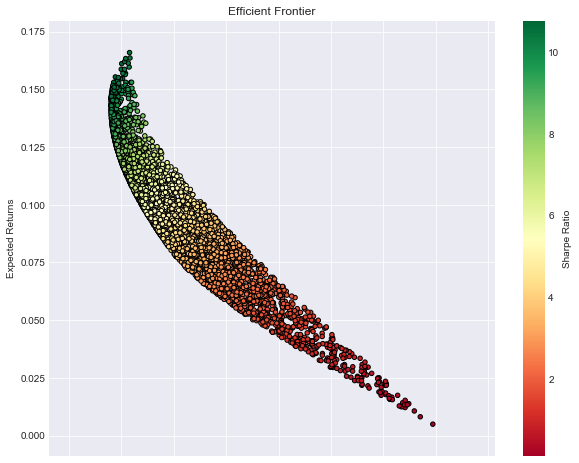

In [17]:
date = list(covariances.keys())[-2]

portfolio = {'Returns': port_returns[date],
                 'Volatility': port_volatility[date],
                 'Sharpe Ratio': sharpe_ratio[date]}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for i, symbol in enumerate(stocks):
    portfolio[symbol + ' Weight'] = [Weight[i] for Weight in stock_weights[date]]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in stocks]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()